# Analyzing multi-year droughts

After van Mourik, J. and Ruijsch, D. and van der Wiel, K. and Hazeleger, W. and Wanders, N. (2025) - [Regional drivers and characteristics of multi-year droughts](https://dx.doi.org/10.2139/ssrn.4974995)

## Load packages

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

import spei as si  # si for standardized index

print(si.show_versions())

Versions
python: 3.10.12
spei: 0.5.2
numpy: 1.26.4
scipy: 1.14.1
matplotlib: 3.9.2
pandas: 2.2.1



## Load meteo data

In [2]:
fileurl = "https://raw.githubusercontent.com/pastas/pastas/master/doc/examples/data"
prec = (
    pd.read_csv(f"{fileurl}/rain_nb1.csv", index_col=0, parse_dates=True)
    .squeeze()
    .multiply(1e3)
)  # to mm
evap = (
    pd.read_csv(f"{fileurl}/evap_nb1.csv", index_col=0, parse_dates=True)
    .squeeze()
    .multiply(1e3)
)  # to mm

## Calculate SPEI over different time scales

1 month to 24 months

In [3]:
pe = (
    (prec - evap).dropna().resample("ME").sum()
)  # calculate  monthly precipitation excess
spei1 = si.spei(pe, timescale=1).rename("1")
spei3 = si.spei(pe, timescale=3).rename("3")
spei6 = si.spei(pe, timescale=6).rename("6")
spei9 = si.spei(pe, timescale=9).rename("9")
spei12 = si.spei(pe, timescale=12).rename("12")
spei24 = si.spei(pe, timescale=24).rename("24")

## Visualization

### Plot as time series

(12784.0, 16436.0)

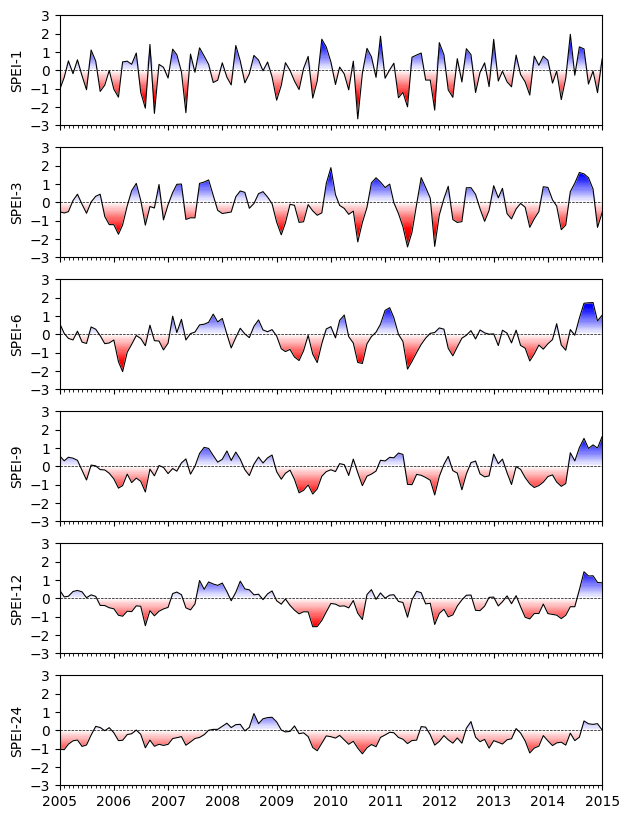

In [4]:
f, ax = plt.subplots(6, figsize=(7.0, 10.0), sharex=True)
si.plot.si(spei1, ax=ax[0])
si.plot.si(spei3, ax=ax[1])
si.plot.si(spei6, ax=ax[2])
si.plot.si(spei9, ax=ax[3])
si.plot.si(spei12, ax=ax[4])
si.plot.si(spei24, ax=ax[5])
ax[0].set_ylabel("SPEI-1")
ax[1].set_ylabel("SPEI-3")
ax[2].set_ylabel("SPEI-6")
ax[3].set_ylabel("SPEI-9")
ax[4].set_ylabel("SPEI-12")
ax[5].set_ylabel("SPEI-24")
ax[5].xaxis.set_major_locator(mpl.dates.YearLocator())
ax[5].xaxis.set_minor_locator(mpl.dates.MonthLocator())
ax[5].set_xlim(pd.Timestamp("2005"), pd.Timestamp("2015"))

### Plot as heatmap

Only droughts

(14610.0, 16436.0)

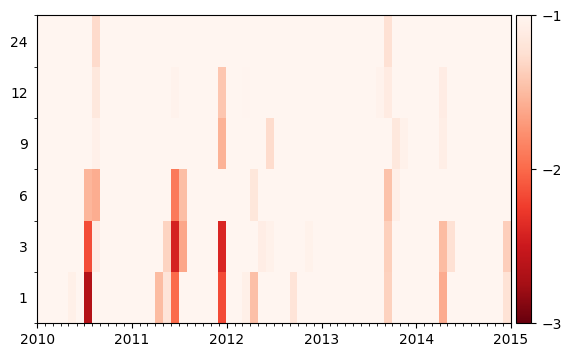

In [5]:
ax = si.plot.heatmap([spei1, spei3, spei6, spei9, spei12, spei24])
ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator())
ax.get_figure().axes[-1].set_yticks(range(-3, 0))
ax.set_xlim(pd.Timestamp("2010"), pd.Timestamp("2015"))

Or with wet periods

(14610.0, 16436.0)

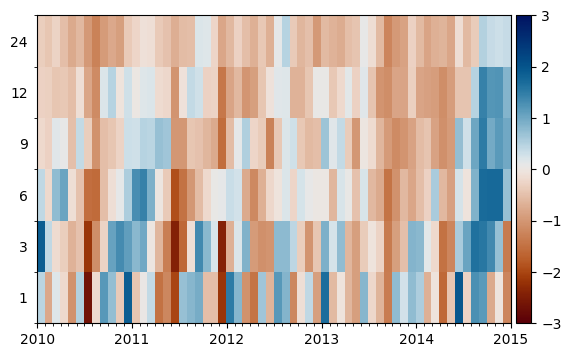

In [6]:
ax = si.plot.heatmap([spei1, spei3, spei6, spei9, spei12, spei24], cmap="vik_r", vmax=3)
ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator())
ax.set_xlim(pd.Timestamp("2010"), pd.Timestamp("2015"))